# cygnus-reward
11/14/2023

Evaluate Cygnus with different reward schemes at 200 and 3200 MT/s

In [29]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
import copy
from importlib import reload
import os

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 1.0
from matplotlib import colormaps
import matplotlib.pyplot as plt
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [30]:
sim_dir = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
bandwidths = [200, 3200]
weights_path = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 192

In [31]:
reload(collate)
studies = {}
for bandwidth in bandwidths:
    print(f"\n=== {bandwidth} MT/s ===")
    core_str = f"default_{bandwidth}"
    core_dir = os.path.join(sim_dir, core_str)

    # Cygnus reward configs
    print(f"~~~ {os.path.join(core_dir, 'my5_accthreshold')} ~~~")
    studies[f"cygnus_reward__{bandwidth}"] = collate.StudyCollator(
        core_dir, "cygnus_reward",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )

    # Baselines
    print(f"~~~ {os.path.join(core_dir, 'prefetchers')} ~~~")
    studies[f"prefetchers__{bandwidth}"] = collate.StudyCollator(
        core_dir, "prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["spp_ppf", "pythia", "my5"],
    )


=== 200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_accthreshold ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 582/582 [00:09<00:00, 62.29file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1129/1129 [00:08<00:00, 135.25file/s]


[ipykernel_launcher][angrist-3] Collating study files...

=== 3200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/my5_accthreshold ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 582/582 [00:09<00:00, 59.46file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1129/1129 [00:08<00:00, 125.97file/s]


[ipykernel_launcher][angrist-3] Collating study files...


# Results

In [32]:
baseline_df_3200 = {
    "Cygnus (Original)": studies[f"cygnus_reward__3200"][f"cygnus"],
    "Cygnus (BW-unaware)": studies[f"cygnus_reward__3200"][f"cygnus__bwunaware"],
    "Cygnus (BW-unaware, Timely-unaware 12)": studies[f"cygnus_reward__3200"][f"cygnus__bwunaware__timelyunaware12"],
    "Cygnus (BW-unaware, Timely-unaware 20)": studies[f"cygnus_reward__3200"][f"cygnus__bwunaware__timelyunaware20"],
    "Cygnus (Timely-unaware 12)": studies[f"cygnus_reward__3200"][f"cygnus__timelyunaware12"],
    "Cygnus (Timely-unaware 20)": studies[f"cygnus_reward__3200"][f"cygnus__timelyunaware20"],
    "Pythia": studies[f"prefetchers__3200"][f"pythia"],
    "SPP+PPF": studies[f"prefetchers__3200"][f"spp_ppf"],
    "my5": studies[f"prefetchers__3200"][f"my5"],
}
baseline_df_200 = {
    "Cygnus (Original)": studies[f"cygnus_reward__200"][f"cygnus"],
    "Cygnus (BW-unaware)": studies[f"cygnus_reward__200"][f"cygnus__bwunaware"],
    "Cygnus (BW-unaware, Timely-unaware 12)": studies[f"cygnus_reward__200"][f"cygnus__bwunaware__timelyunaware12"],
    "Cygnus (BW-unaware, Timely-unaware 20)": studies[f"cygnus_reward__200"][f"cygnus__bwunaware__timelyunaware20"],
    "Cygnus (Timely-unaware 12)": studies[f"cygnus_reward__200"][f"cygnus__timelyunaware12"],
    "Cygnus (Timely-unaware 20)": studies[f"cygnus_reward__200"][f"cygnus__timelyunaware20"],
    "Pythia": studies[f"prefetchers__200"][f"pythia"],
    "SPP+PPF": studies[f"prefetchers__200"][f"spp_ppf"],
    "my5": studies[f"prefetchers__200"][f"my5"],
}
baseline_colors = {
    "Cygnus (Original)": colormaps["Set3"](0),
    "Cygnus (BW-unaware)": colormaps["Set3"](0),
    "Cygnus (BW-unaware, Timely-unaware 12)": colormaps["Set3"](0),
    "Cygnus (BW-unaware, Timely-unaware 20)": colormaps["Set3"](0),
    "Cygnus (Timely-unaware 12)": colormaps["Set3"](0),
    "Cygnus (Timely-unaware 20)": colormaps["Set3"](0),
    "my5"    : colormaps["Set3"](9),
    "Pythia" : colormaps["Set3"](2),
    "SPP+PPF": colormaps["Set3"](6),
}
baseline_hatches = {
    "Cygnus (Original)": "",
    "Cygnus (BW-unaware)": "///",
    "Cygnus (BW-unaware, Timely-unaware 12)": "xxx",
    "Cygnus (BW-unaware, Timely-unaware 20)": "+++",
    "Cygnus (Timely-unaware 12)": "...",
    "Cygnus (Timely-unaware 20)": "ooo",
    "my5": "",
    "Pythia" : "",
    "SPP+PPF": "",
}
baseline_legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
baseline_legend_kwargs_wide = {
    "ncol": 6,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
baseline_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

## 3200 MT/s

### IPC improvement

In [33]:
reload(plot)
plot.get_suite_table(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Cygnus (Original),34.252495,25.804238,10.741114,21.877458,22.874702
Cygnus (BW-unaware),34.360878,26.386333,10.730330,21.861051,23.034275
"Cygnus (BW-unaware, Timely-unaware 12)",34.204487,26.522029,10.604083,21.424180,22.885992
"Cygnus (BW-unaware, Timely-unaware 20)",34.445664,26.133027,10.787741,22.125563,23.074612
Cygnus (Timely-unaware 12),34.065499,25.979206,10.608551,21.417486,22.721727
Cygnus (Timely-unaware 20),34.257750,25.580778,10.772784,22.103684,22.887043
Pythia,26.610409,20.813901,7.597408,19.632290,18.456565
SPP+PPF,32.208799,22.860580,7.766227,18.423648,19.990955
my5,29.635344,21.920663,8.431924,18.328960,19.333461


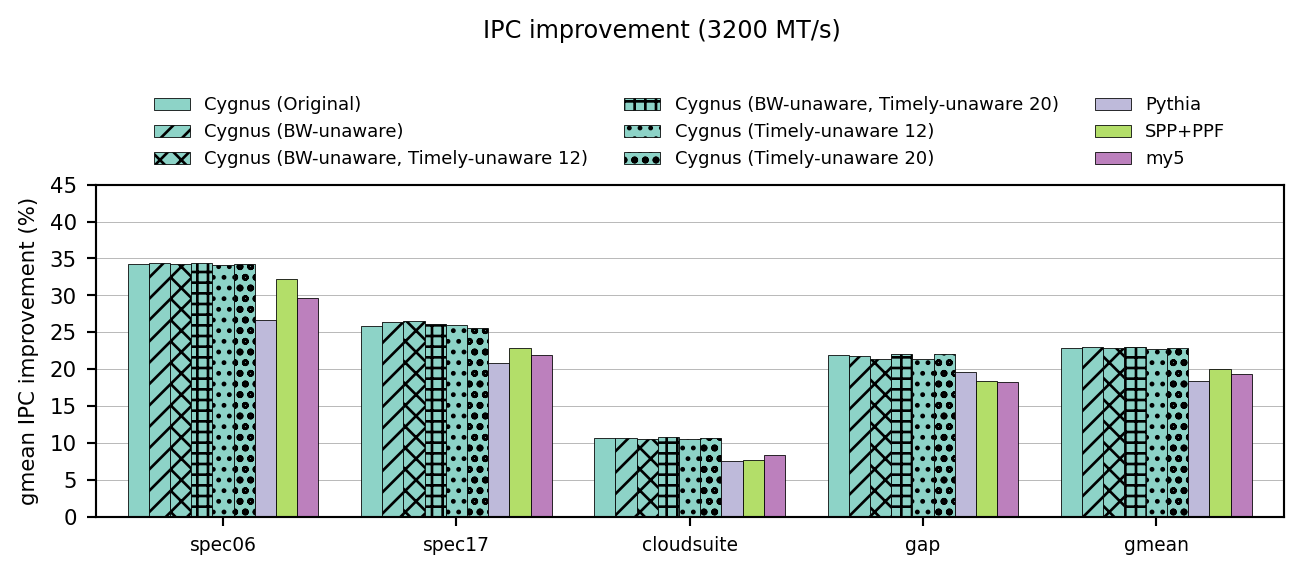

In [34]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 45),
    ytick_distance=5,
    dpi=192, figsize=(7, 3))
plt.savefig("cygnus_reward_ipc_3200.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("cygnus_reward_ipc_3200.png", dpi=dpi, bbox_inches="tight")

#### spec06

In [35]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
GemsFDTD,78.823743,78.634110,79.245647,77.939407,79.390248,78.120560,67.456766,77.372909,62.960580
astar,6.741404,6.765250,6.712080,6.680388,6.681097,6.635704,6.661678,7.139077,2.028227
bwaves,43.839102,43.853023,45.720466,43.493670,45.708410,43.510771,24.388410,49.160476,20.868293
cactusADM,66.222297,66.195046,66.192492,66.193298,66.102400,66.160826,53.091516,64.158014,41.823720
gcc,32.046024,32.053975,29.939460,32.328231,29.905488,32.339640,16.665946,23.319753,24.695838
lbm,50.286038,50.292550,50.300077,50.453699,50.315488,50.407245,41.026537,48.108897,49.582529
leslie3d,31.053402,31.056013,31.256972,30.954757,31.268488,30.942542,26.225972,30.495707,25.129427
libquantum,67.107738,67.107738,66.913208,66.804456,66.913208,66.804456,49.897245,62.830374,67.037749
mcf,10.975090,12.420492,11.599096,13.590893,10.016347,11.291259,12.980070,8.719207,24.581670
milc,10.578002,10.505101,11.274678,9.559451,11.305656,9.610434,13.078440,18.407892,25.876553


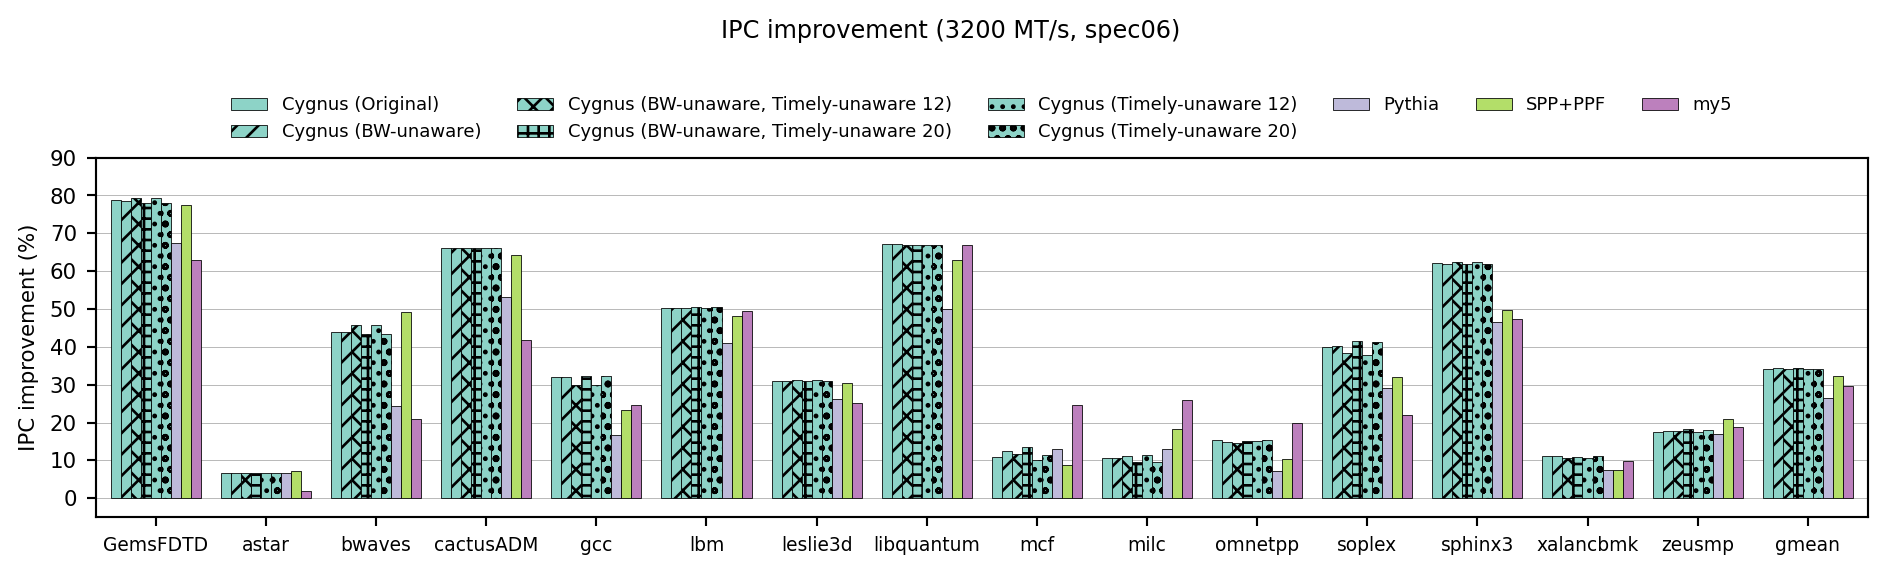

In [49]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs_wide,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s, spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

#### spec17

In [37]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
602.gcc,66.784417,66.775438,66.769368,66.738220,66.772574,66.741889,61.682199,63.946845,64.413853
605.mcf,7.526444,7.446952,8.040166,6.629946,8.122875,6.773375,5.487090,13.834952,10.534453
607.cactuBSSN,28.143027,33.917117,33.807643,34.710596,28.385437,29.388900,32.860009,26.225208,11.688620
619.lbm,22.596278,22.578357,22.553355,22.651101,22.600598,22.599832,18.320052,20.883976,21.986045
620.omnetpp,9.593929,9.593872,8.930337,9.347187,8.854488,9.370563,4.766830,4.084605,10.922158
623.xalancbmk,11.861146,11.865600,11.843193,11.053423,11.849589,11.101847,9.336954,8.908960,14.316281
627.cam4,2.187452,2.021751,2.188180,2.378359,2.424908,2.310457,1.656462,1.462569,0.707176
628.pop2,18.377028,18.380714,18.370047,18.331803,18.319561,18.319574,13.037956,14.624107,9.759543
649.fotonik3d,88.922485,88.915843,90.803699,86.991808,90.851852,86.988791,55.377443,69.897745,71.518744
gmean,25.804238,26.386333,26.522029,26.133027,25.979206,25.580778,20.813901,22.860580,21.920663


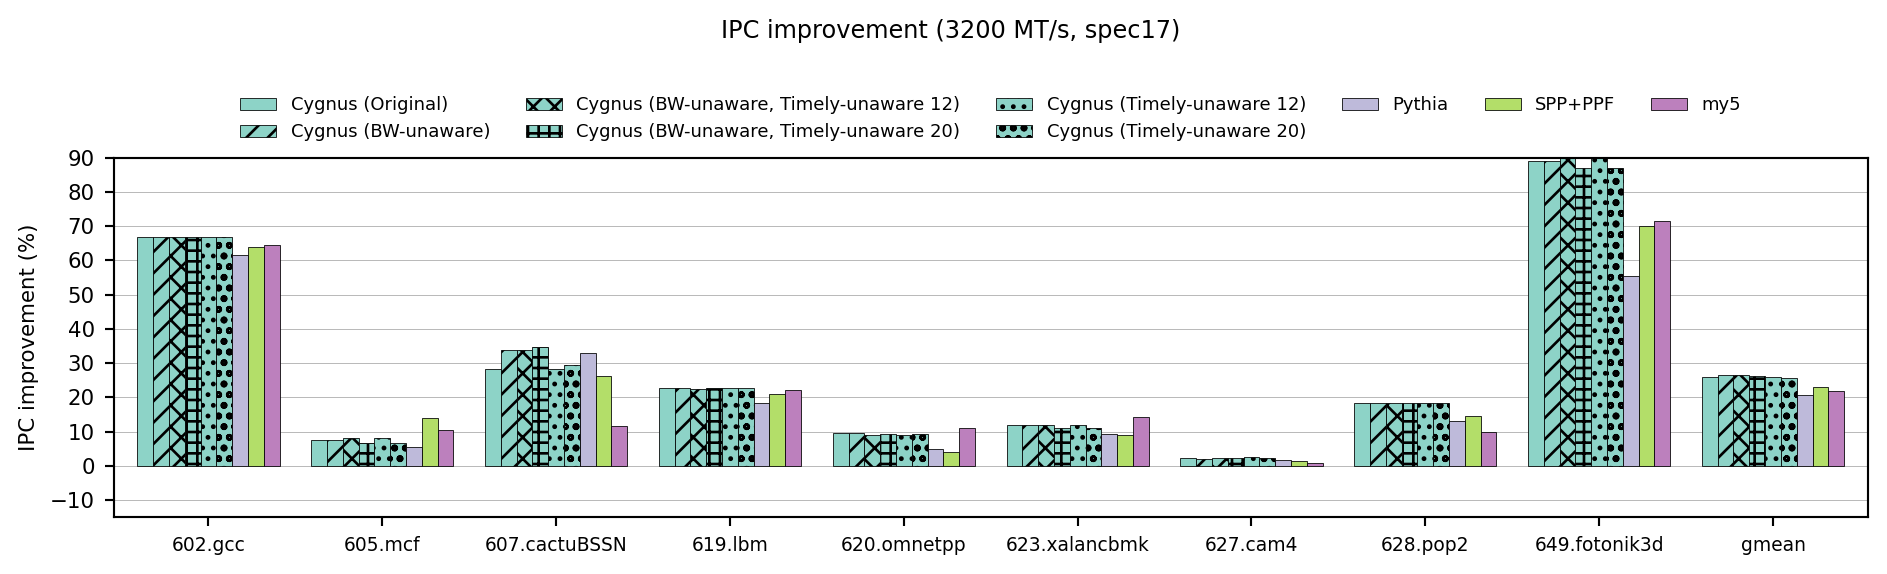

In [48]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs_wide,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s, spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

#### cloudsuite

In [39]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
cassandra,10.975471,10.951161,11.018671,10.363491,11.042728,10.354782,10.679946,10.435769,10.899316
classifcation,-9.856146,-9.868177,-9.396766,-10.228984,-9.360549,-10.232204,-8.431991,-7.626151,-1.605971
cloud9,24.489653,24.503592,23.217741,25.862684,23.185924,25.811314,13.247164,13.130756,8.143545
nutch,20.764470,20.746483,20.745699,20.811499,20.721978,20.809437,16.779658,16.866817,17.146801
gmean,10.741114,10.730330,10.604083,10.787741,10.608551,10.772784,7.597408,7.766227,8.431924


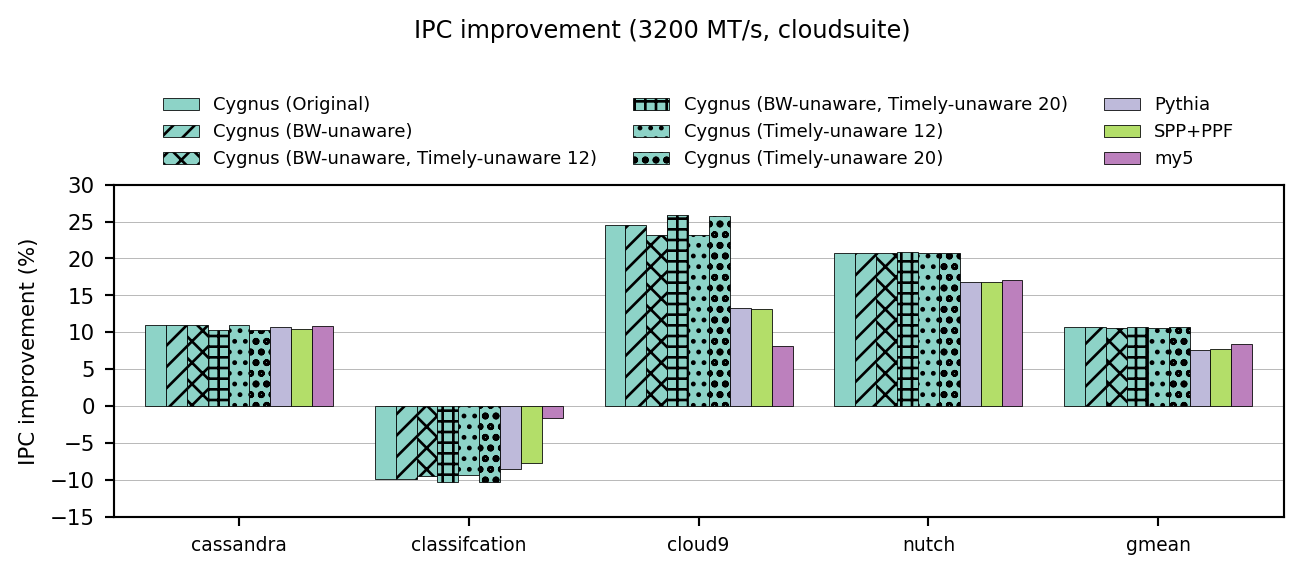

In [47]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s, cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 30),
    ytick_distance=5,
    dpi=192, figsize=(7, 3))

#### gap

In [41]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
bc,11.893636,11.839604,11.866509,12.037337,11.803023,11.996990,11.617661,10.000532,9.916844
bfs,61.286434,61.205508,57.689965,62.483760,57.746412,62.457755,47.355363,48.376595,44.028667
cc,34.885207,34.880949,34.761975,35.045997,34.808991,35.055872,33.167361,31.948580,34.364662
pr,2.605232,2.592711,2.467246,2.908706,2.485120,2.889698,2.750370,2.112297,2.140314
sssp,8.280371,8.316186,8.510939,8.314451,8.441054,8.266459,8.610742,5.410705,4.341574
tc,21.186305,21.186305,21.255369,21.072777,21.255369,21.072777,19.932712,18.987937,21.085867
gmean,21.877458,21.861051,21.424180,22.125563,21.417486,22.103684,19.632290,18.423648,18.328960


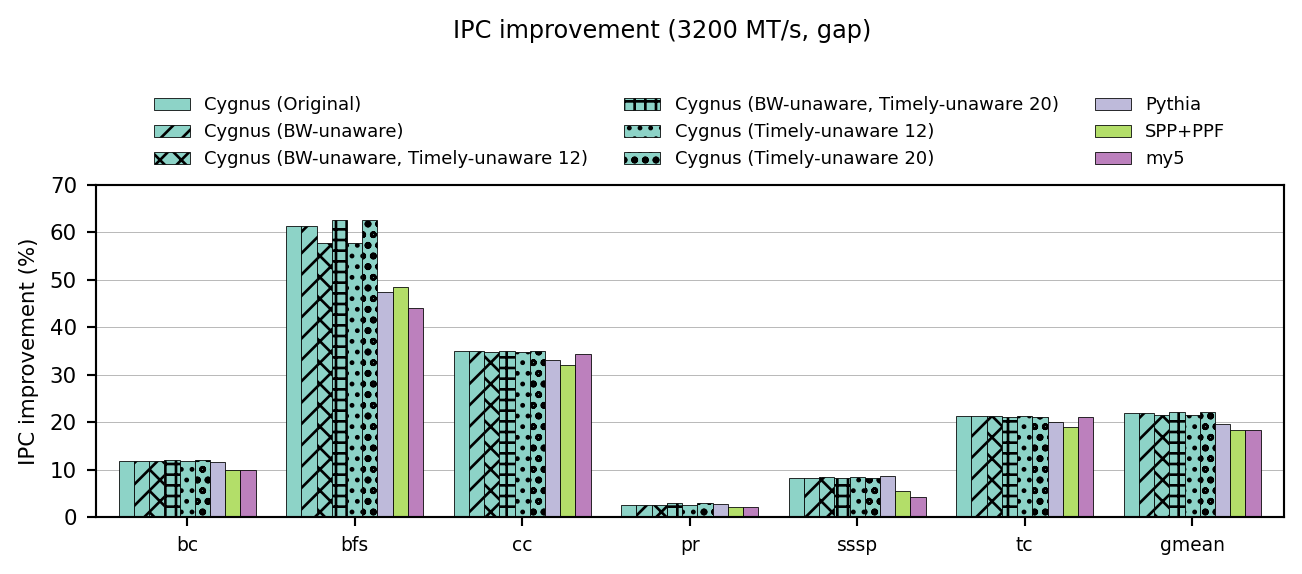

In [44]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s, gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 70),
    ytick_distance=10,
    dpi=192, figsize=(7, 3))

## 200 MT/s

### IPC improvement

In [45]:
reload(plot)
plot.get_suite_table(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Cygnus (Original),7.045087,10.055331,5.138191,32.250233,13.131538
Cygnus (BW-unaware),6.873011,10.013542,5.047817,32.269560,13.055132
"Cygnus (BW-unaware, Timely-unaware 12)",6.787202,10.092713,4.352837,31.856869,12.777172
"Cygnus (BW-unaware, Timely-unaware 20)",6.853975,10.099686,3.865665,31.948440,12.684260
Cygnus (Timely-unaware 12),6.951844,10.118290,4.327898,31.820263,12.812595
Cygnus (Timely-unaware 20),7.033619,10.043967,3.917264,31.937905,12.729072
Pythia,6.634564,9.004599,0.782206,28.220061,10.705874
SPP+PPF,6.158251,10.074553,-0.632222,28.332860,10.485691
my5,7.864061,12.803516,4.676752,27.666547,12.922813


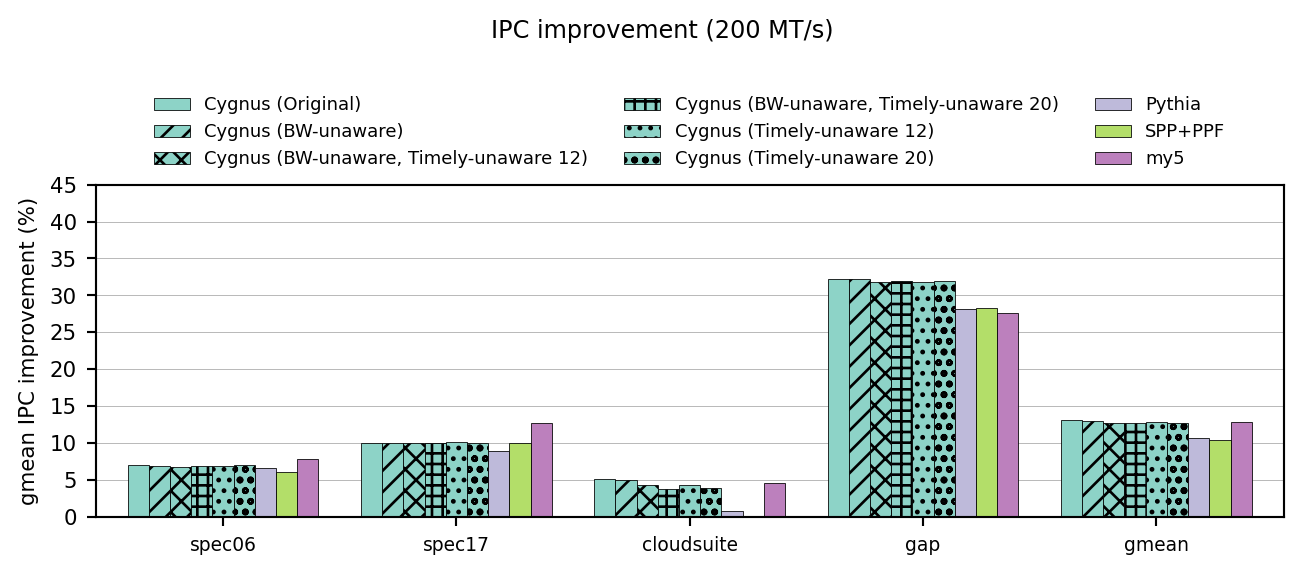

In [46]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 45),
    ytick_distance=5,
    dpi=192, figsize=(7, 3))
plt.savefig("cygnus_reward_ipc_3200.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("cygnus_reward_ipc_3200.png", dpi=dpi, bbox_inches="tight")

#### spec06

In [50]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
GemsFDTD,1.492081,1.096466,1.054939,0.964901,1.423039,1.333031,0.363902,-0.711121,1.128288
astar,5.901891,5.912592,5.840713,6.225951,5.829111,6.138876,8.399857,10.434564,3.608290
bwaves,11.817807,11.826508,11.833126,11.832499,11.834866,11.825995,9.389400,11.526736,8.896853
cactusADM,30.520565,30.531367,30.361820,30.610665,30.324701,30.572331,28.655017,30.550407,23.779923
gcc,4.327492,4.349482,3.236298,7.735926,3.256146,7.616958,13.230451,14.210574,12.378841
lbm,5.421507,5.421507,5.208671,5.409930,5.210743,5.409029,4.930386,5.263389,5.508011
leslie3d,2.929314,2.885330,2.905556,2.808473,2.960312,2.825432,3.198196,3.101507,3.202088
libquantum,20.650682,20.650682,20.513438,20.785180,20.513438,20.785180,20.501893,20.419948,20.771977
mcf,0.700871,0.693321,0.701745,2.386793,0.689277,2.311221,2.078901,3.507582,17.427433
milc,-2.915142,-2.956289,-2.553795,-3.117519,-2.517611,-3.096567,-2.690260,-2.000381,3.814834


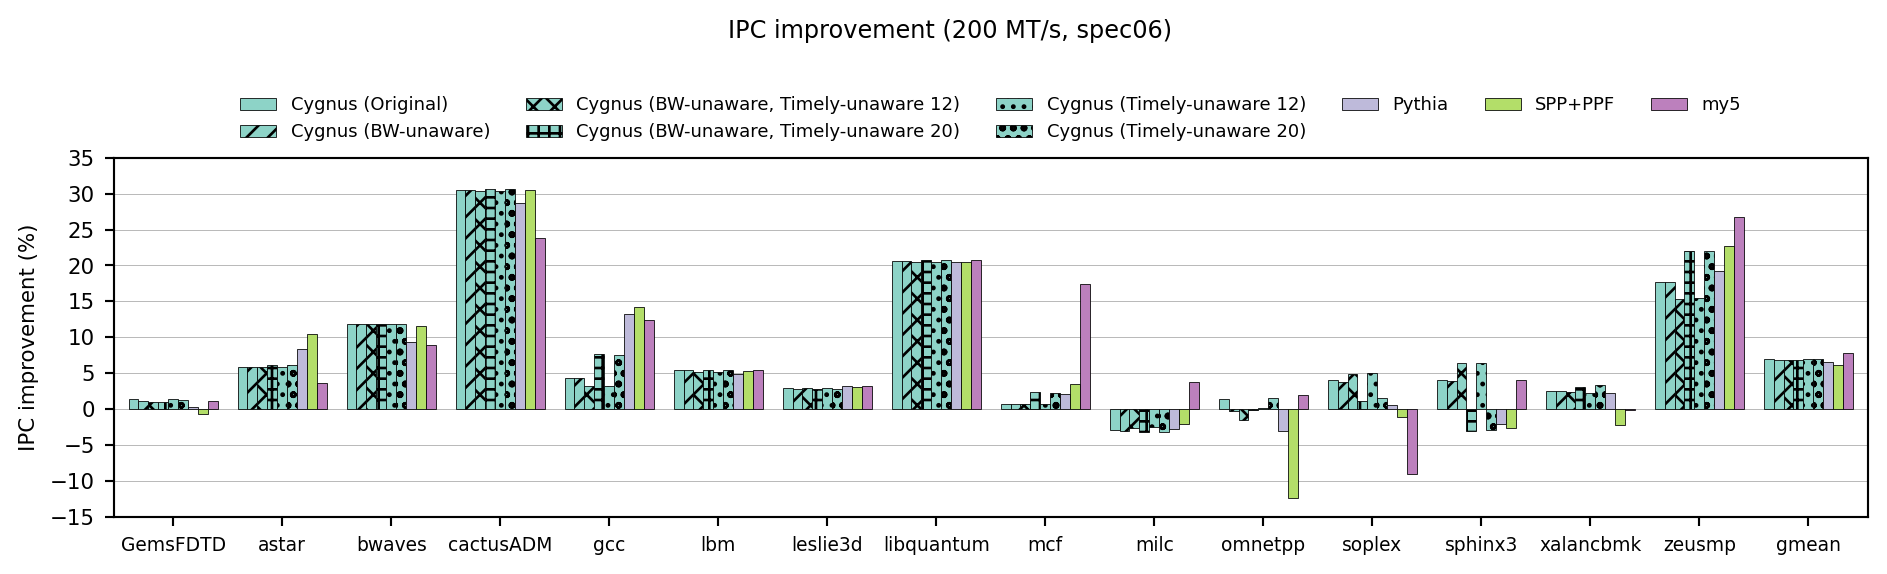

In [56]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs_wide,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s, spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 35),
    ytick_distance=5,
    dpi=192, figsize=(10, 3))

#### spec17

In [65]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
602.gcc,102.003823,101.993391,104.140947,101.780257,104.150382,101.819641,103.359478,99.659990,98.712190
605.mcf,-3.754400,-4.054323,-3.658095,-4.861206,-3.372719,-4.606412,-11.571318,-1.914458,7.230852
607.cactuBSSN,0.021463,-0.024810,-0.038380,0.997776,0.020953,0.255810,5.091621,10.484834,9.127455
619.lbm,2.570451,2.581374,2.447395,2.581097,2.437331,2.581311,2.276043,2.472395,2.625128
620.omnetpp,-0.100842,-0.093892,-0.275654,1.105287,-0.275205,1.082777,-3.550951,-8.154200,5.356975
623.xalancbmk,7.823469,7.812163,7.617321,7.300677,7.551180,7.305951,5.750270,5.836173,10.328046
627.cam4,0.850171,0.882673,0.926507,0.827221,0.869006,0.831316,0.917394,0.598596,0.028514
628.pop2,6.457683,6.434881,6.085556,6.393885,6.061517,6.404022,6.039929,6.415652,4.025320
649.fotonik3d,2.686895,2.690823,2.660348,2.704265,2.660177,2.702565,2.988544,2.821968,2.461248
gmean,10.055331,10.013542,10.092713,10.099686,10.118290,10.043967,9.004599,10.074553,12.803516


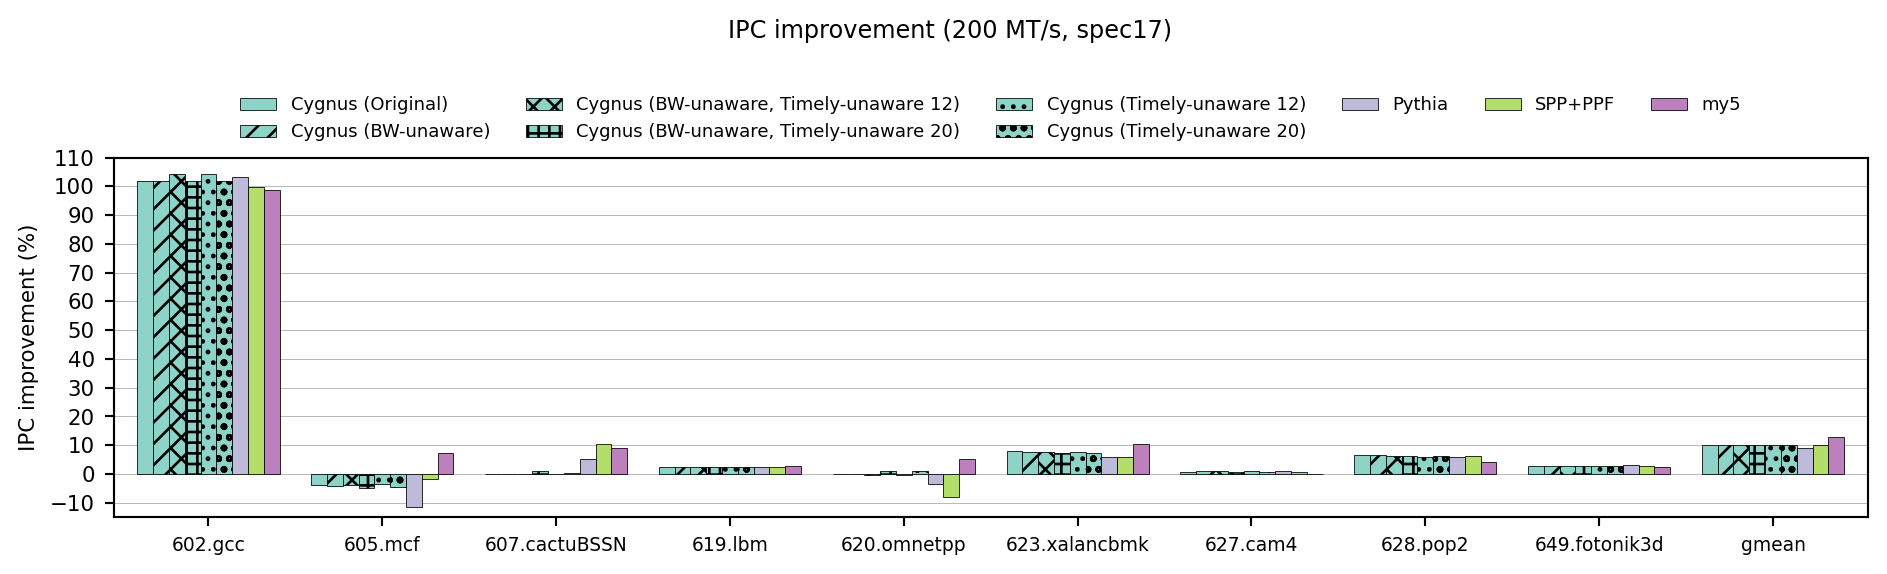

In [67]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs_wide,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s, spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 110),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

#### cloudsuite

In [64]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
cassandra,1.484486,1.491619,1.385687,0.251000,1.385578,0.277092,-0.477052,-6.821497,6.389319
classifcation,-8.201417,-8.503881,-8.130163,-12.630729,-8.213541,-12.483176,-19.229083,-18.353937,-6.400863
cloud9,11.057764,11.074375,10.468490,11.428024,10.481867,11.405277,10.035433,12.800505,2.948923
nutch,18.102053,18.059623,15.246840,19.246646,15.227471,19.275643,16.633854,13.610979,17.114124
gmean,5.138191,5.047817,4.352837,3.865665,4.327898,3.917264,0.782206,-0.632222,4.676752


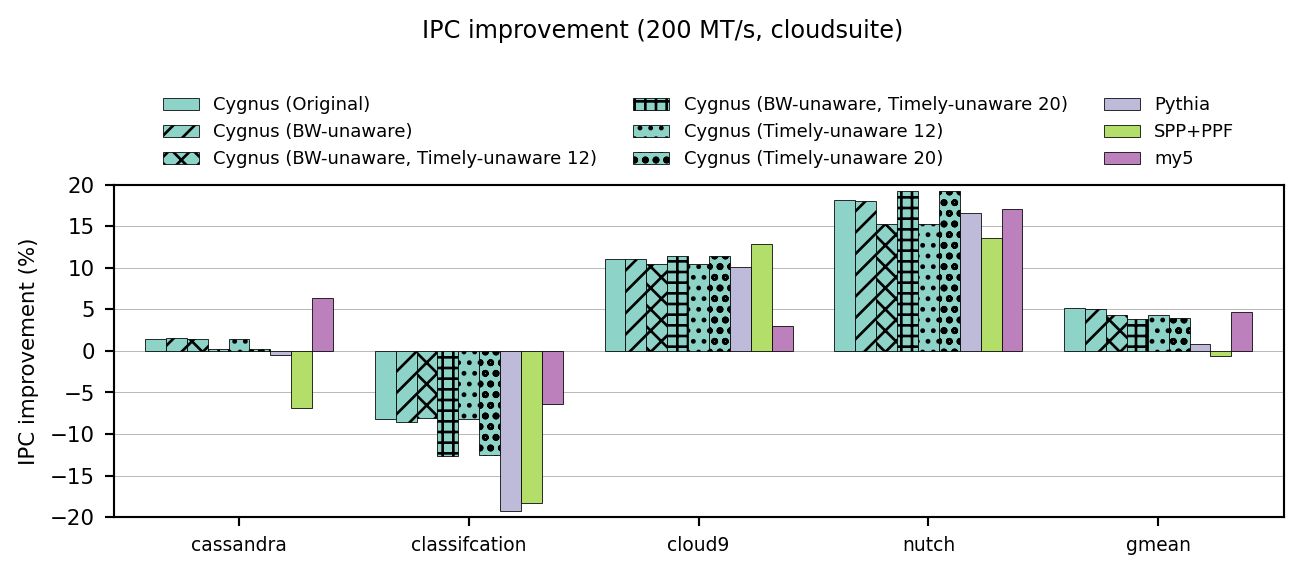

In [63]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s, cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 20),
    ytick_distance=5,
    dpi=192, figsize=(7, 3))

#### gap

In [58]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (Original),Cygnus (BW-unaware),"Cygnus (BW-unaware, Timely-unaware 12)","Cygnus (BW-unaware, Timely-unaware 20)",Cygnus (Timely-unaware 12),Cygnus (Timely-unaware 20),Pythia,SPP+PPF,my5
bc,16.228575,16.235725,16.040247,16.484903,16.035959,16.645287,13.706624,14.414280,11.160025
bfs,43.458217,43.475765,45.684205,42.636822,45.683139,42.508628,37.227838,37.663890,38.741858
cc,81.004394,81.044497,80.440403,81.073579,80.380224,81.045801,78.074675,74.976017,81.479831
pr,6.457901,6.528197,7.134864,7.250063,7.143782,7.250091,7.761415,6.075710,6.931833
sssp,11.228229,11.207243,11.815194,9.318599,11.661960,9.230885,7.910755,8.867183,0.017559
tc,49.712577,49.712577,43.823553,49.615838,43.823553,49.615838,37.523755,40.357462,44.642160
gmean,32.250233,32.269560,31.856869,31.948440,31.820263,31.937905,28.220061,28.332860,27.666547


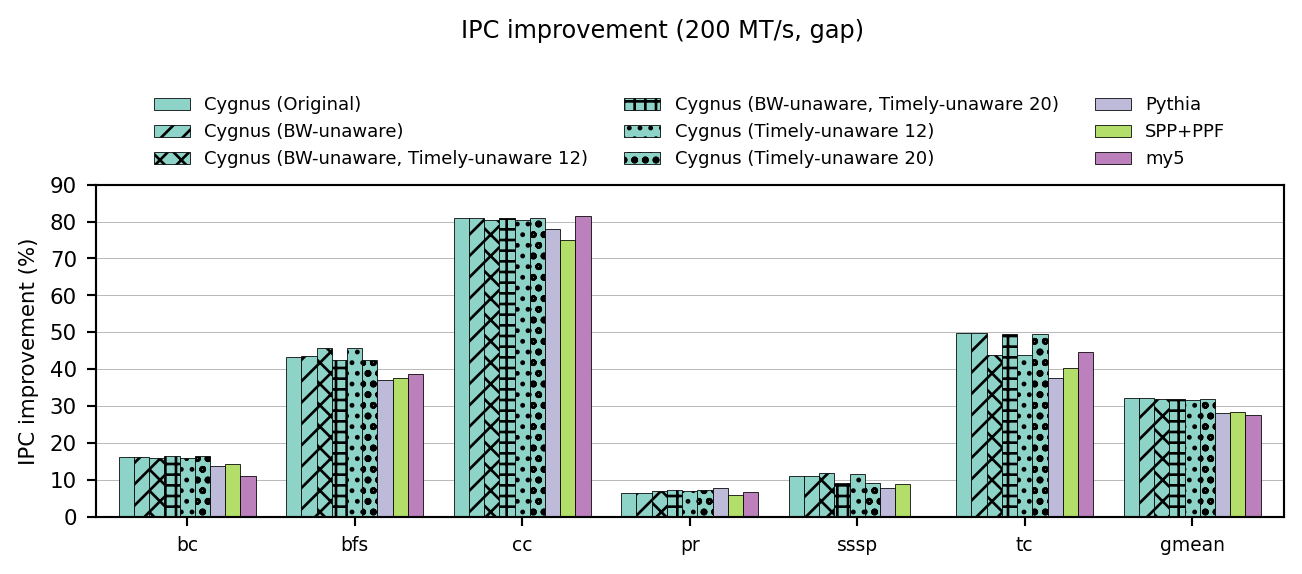

In [60]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s, gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 90),
    ytick_distance=10,
    dpi=192, figsize=(7, 3))